# Линейные модели в машинном обучении

hjhhkhkh

# Этап 1.Загрузка данных 


In [1]:
#импорт необходимых библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from scipy import stats
import seaborn as sns
from typing import List



In [2]:
try:
    df_ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')
    df_ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
    df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')
except Exception:
    df_ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep = ';')
    df_ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep = ';')
    df_cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep = ';')

In [3]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [4]:
df_ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [5]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [6]:
df_ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB


In [8]:
df_cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076"
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081"
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074"
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061"
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074"


# Этап 2. Предобработка данных 

In [46]:
df_ferma_main  = df_ferma_main.rename(columns={'порода папы_быка':'Порода папы быка'})

дубли

In [9]:
data_frame = [df_ferma_main, df_ferma_dad, df_cow_buy]

for data in data_frame:
    if data.duplicated().sum() > 0:
        data.drop_duplicates(inplace=True)
    #создаем словарь, где ключ - название переменной, чтобы название переменной передать в f-строку
    data_name = [key for key, value in locals().items() if value is data][0]
    print(f'Количество дубликатов в датафрейме {data_name}: {data.duplicated().sum()}')
    

Количество дубликатов в датафрейме df_ferma_main: 0
Количество дубликатов в датафрейме df_ferma_dad: 0
Количество дубликатов в датафрейме df_cow_buy: 0


проверим неявные дубликаты 

In [47]:
columns = ['Порода', 'Тип пастбища', 'Порода папы быка', 'Вкус молока', 'Возраст']

for column in columns:
    unique_values = df_ferma_main[column].unique()
    print(f'Уникальные значения в колонке {column}: {unique_values}')


Уникальные значения в колонке Порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в колонке Тип пастбища: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в колонке Порода папы быка: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения в колонке Вкус молока: ['вкусно' 'не вкусно']
Уникальные значения в колонке Возраст: ['более_2_лет' 'менее_2_лет']


In [48]:
df_ferma_main['Тип пастбища'] = df_ferma_main['Тип пастбища'].replace('Равнинные','Равнинное')
df_ferma_main['Порода папы быка'] = df_ferma_main['Порода папы быка'].replace('Айдиалл','Айдиал')


пропуски

In [10]:
for data in data_frame:
    data_name = [key for key, value in locals().items() if value is data][0]
    print(f'прошущенные значения в {data_name}:\n{data.isnull().sum().sort_values()}')
    print()

прошущенные значения в df_ferma_main:
id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

прошущенные значения в df_ferma_dad:
id          0
Имя Папы    0
dtype: int64

прошущенные значения в df_cow_buy:
Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
dtype: int64



In [11]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     629 non-null    int64 
 1   Удой, кг                               629 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    object
 3   Сырой протеин, г                       629 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    object
 5   Порода                                 629 non-null    object
 6   Тип пастбища                           629 non-null    object
 7   порода папы_быка                       629 non-null    object
 8   Жирность,%                             629 non-null    object
 9   Белок,%                                629 non-null    object
 10  Вкус молока                            629 non-null    object
 11  Возраст            

In [12]:
df_ferma_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [13]:
def replace_comma_with_dot(df_name: str, columns: List[str]):
    df = globals()[df_name]  # Получение датафрейма по его названию
    for column in columns:
        df[column] = df[column].apply(lambda x: str(x).replace(',', '.')).astype(float)

In [14]:
columns_to_change_type = ['ЭКЕ (Энергетическая кормовая единица)', 
                          'Сырой протеин, г', 'Жирность,%', 'Белок,%']

replace_comma_with_dot('df_ferma_main', columns_to_change_type)

In [15]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   Удой, кг                               629 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    float64
 3   Сырой протеин, г                       629 non-null    float64
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    object 
 5   Порода                                 629 non-null    object 
 6   Тип пастбища                           629 non-null    object 
 7   порода папы_быка                       629 non-null    object 
 8   Жирность,%                             629 non-null    float64
 9   Белок,%                                629 non-null    float64
 10  Вкус молока                            629 non-null    object 
 11  Возрас

In [16]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [17]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   16 non-null     object
 1   Тип пастбища             16 non-null     object
 2   порода папы_быка         16 non-null     object
 3   Имя_папы                 16 non-null     object
 4   Текущая_жирность,%       16 non-null     object
 5   Текущий_уровень_белок,%  16 non-null     object
dtypes: object(6)
memory usage: 896.0+ bytes


In [18]:
columns_to_change_type = ['Текущая_жирность,%', 'Текущий_уровень_белок,%']
replace_comma_with_dot('df_cow_buy', columns_to_change_type)

In [19]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 18
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   16 non-null     object 
 1   Тип пастбища             16 non-null     object 
 2   порода папы_быка         16 non-null     object 
 3   Имя_папы                 16 non-null     object 
 4   Текущая_жирность,%       16 non-null     float64
 5   Текущий_уровень_белок,%  16 non-null     float64
dtypes: float64(2), object(4)
memory usage: 896.0+ bytes


# Этап 3. Исследовательский анализ данных

In [35]:
def create_histogram(data, column, title, bins=50):
    plt.figure(figsize=(12, 6))
    sns.set()
    sns.histplot(data=data, x=column, kde=True, bins=bins)
    plt.title(title, fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.show()


In [32]:
def create_barplot(data, column, tittle):
    plt.figure(figsize=(10, 6))
    new_data = data[column].value_counts()
    df_new_data = new_data.reset_index()
    df_new_data.columns = [column, 'count']
    sns.barplot(x=column, y='count', data = df_new_data)
    plt.title(tittle)
    plt.xlabel(f'{column}')
    plt.ylabel(f'количество {column}')

Проанализируем удой 

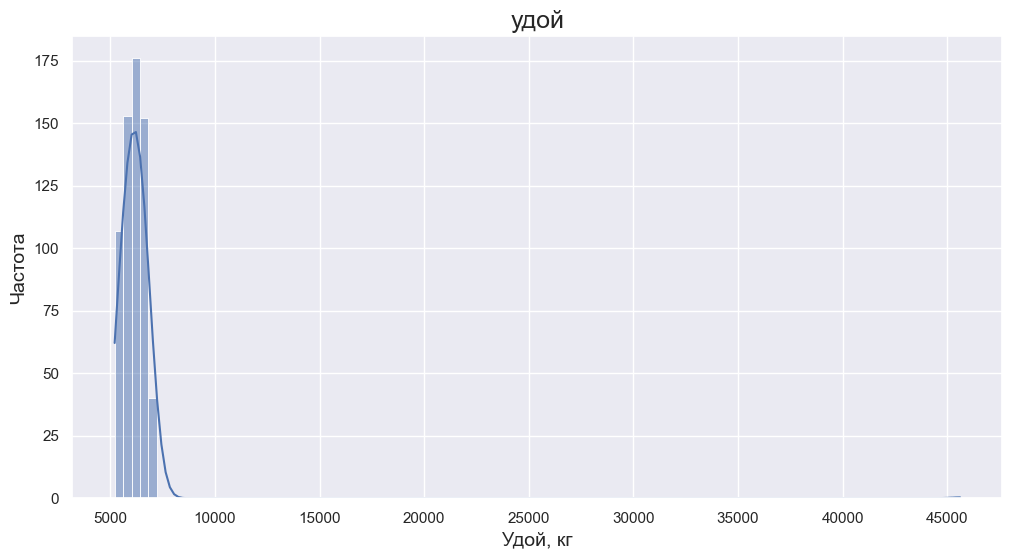

In [28]:
create_histogram(df_ferma_main, 'Удой, кг', 'удой', 100)

In [29]:
df_ferma_main = df_ferma_main[df_ferma_main['Удой, кг'] <= 10000]


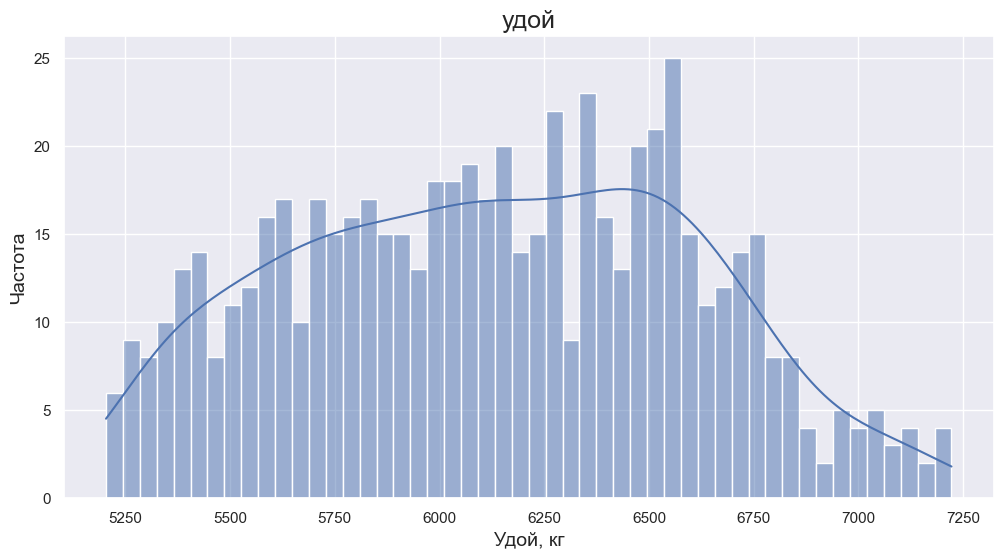

In [36]:
create_histogram(df_ferma_main, 'Удой, кг', 'удой')

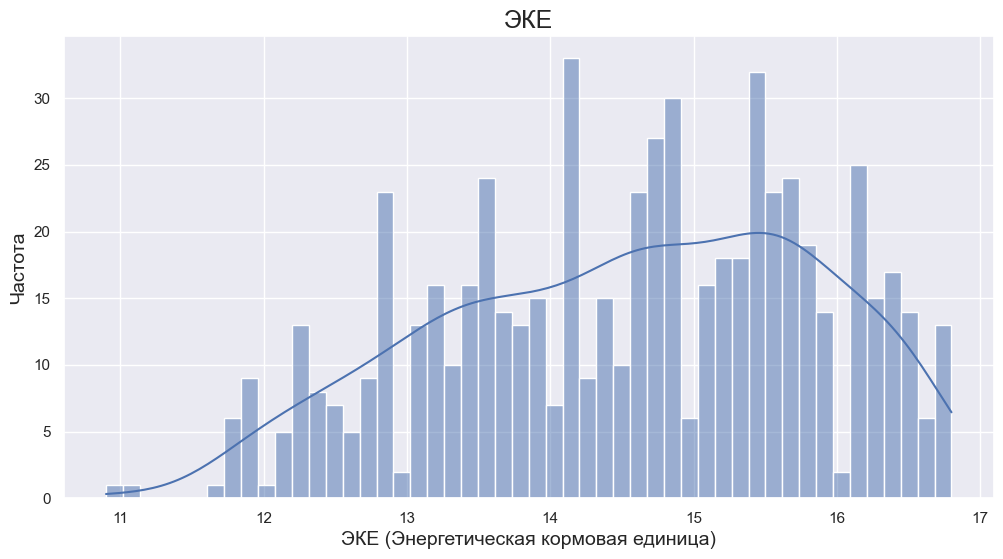

In [37]:
create_histogram(df_ferma_main, 'ЭКЕ (Энергетическая кормовая единица)', 'ЭКЕ')

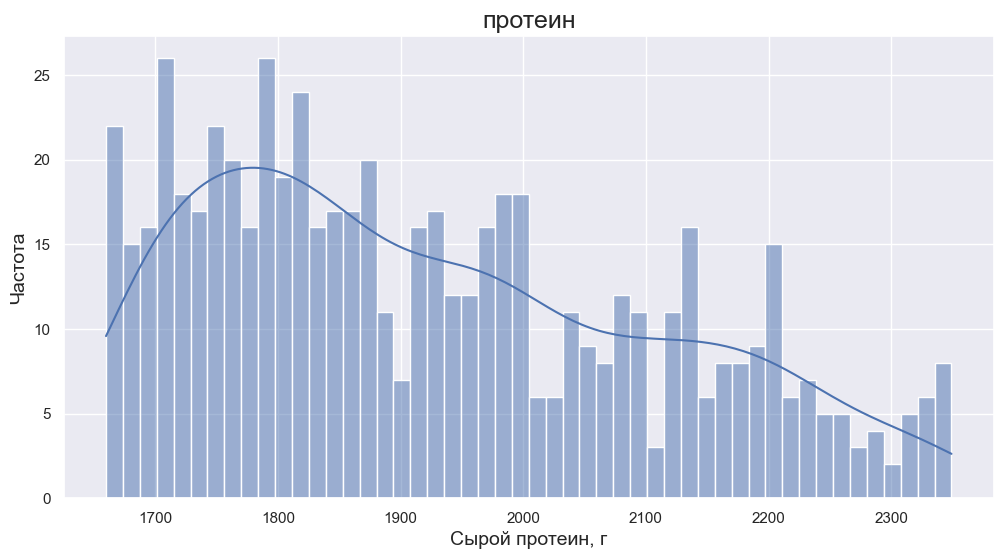

In [38]:
create_histogram(df_ferma_main, 'Сырой протеин, г', 'протеин')

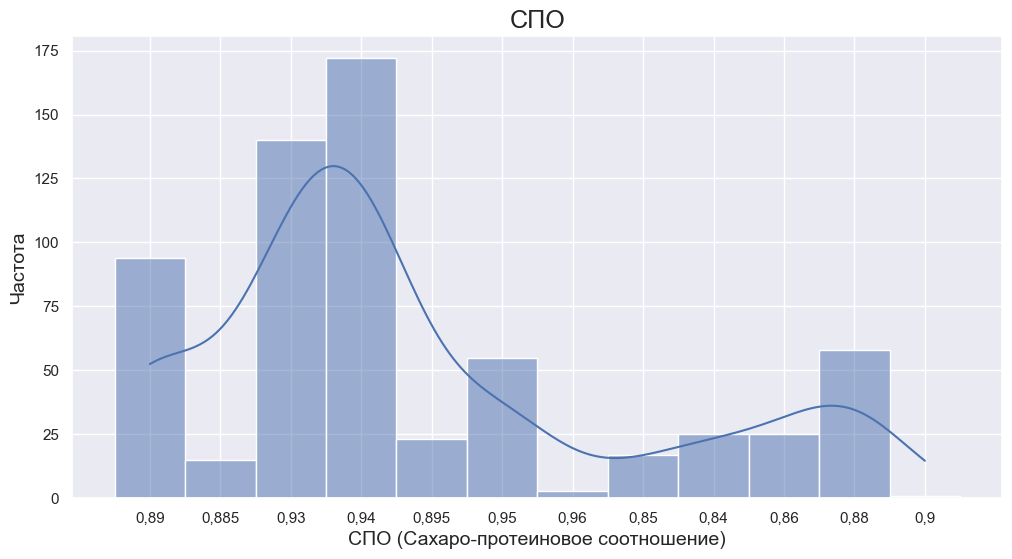

In [39]:
create_histogram(df_ferma_main, 'СПО (Сахаро-протеиновое соотношение)', 'СПО')

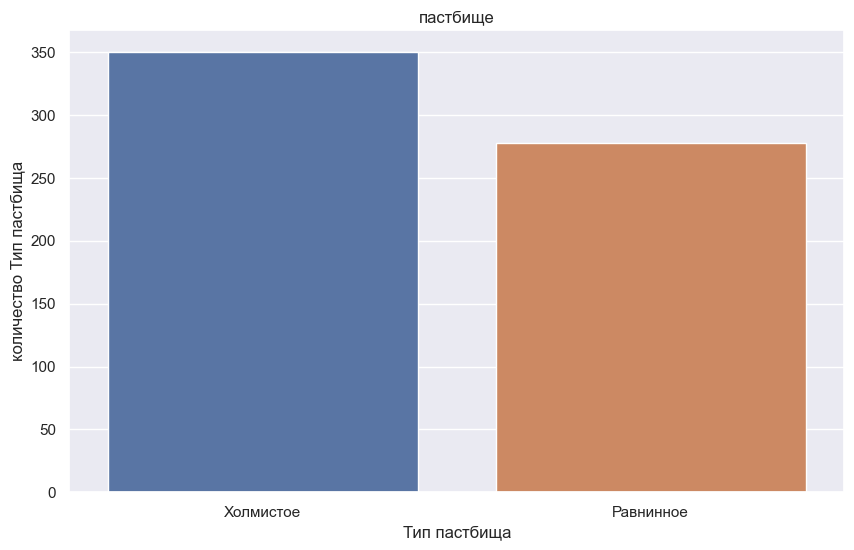

In [49]:
create_barplot(df_ferma_main, 'Тип пастбища', 'пастбище')

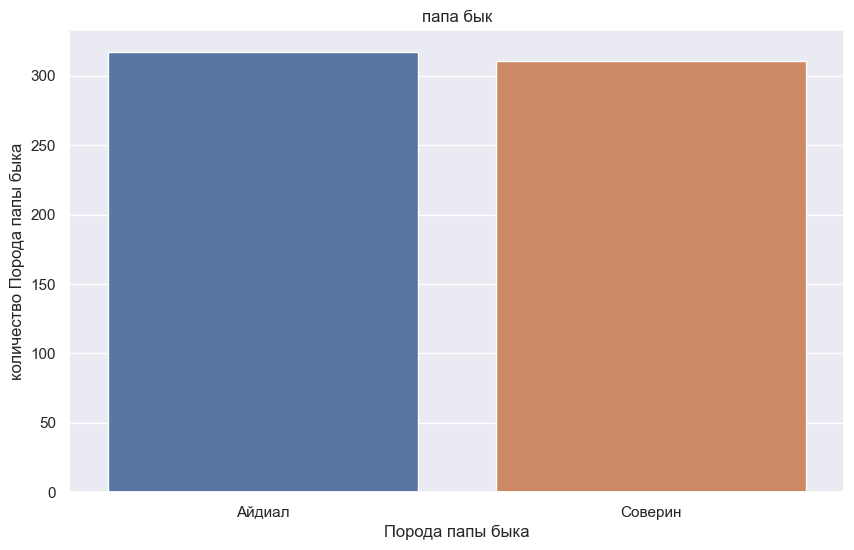

In [50]:
create_barplot(df_ferma_main, 'Порода папы быка', 'папа бык')

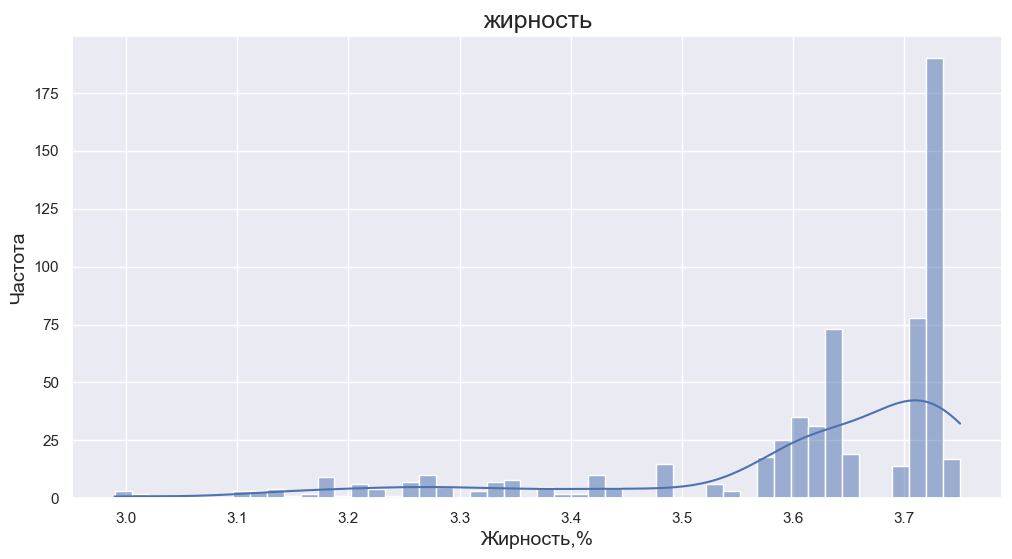

In [51]:
create_histogram(df_ferma_main, 'Жирность,%', 'жирность')

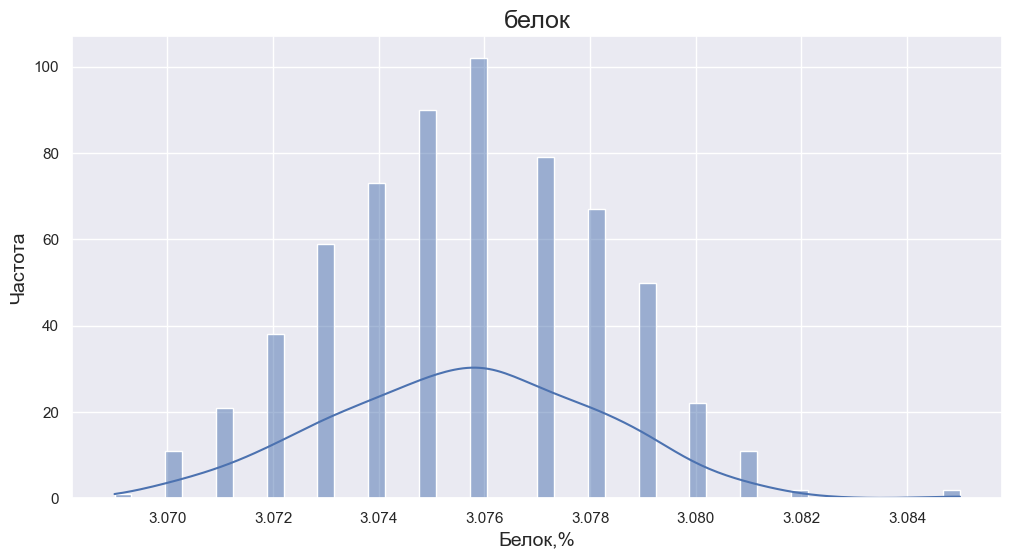

In [52]:
create_histogram(df_ferma_main, 'Белок,%', 'белок')

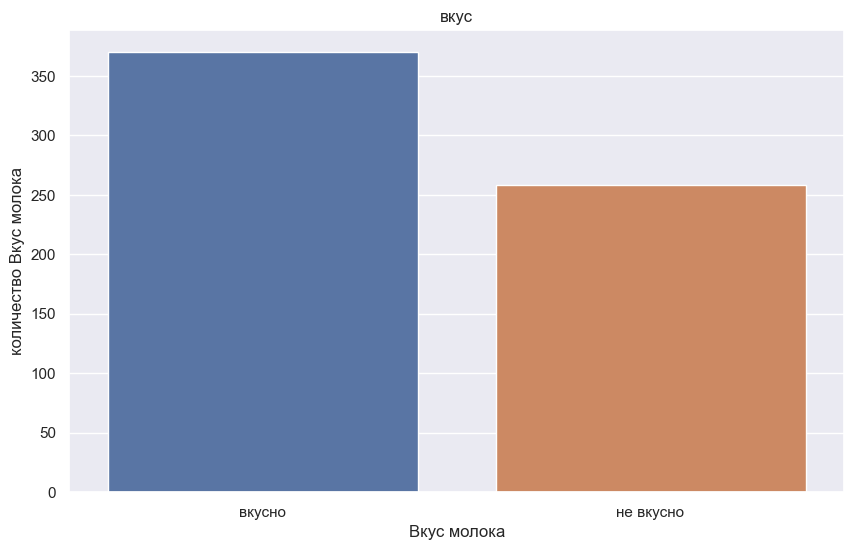

In [53]:
create_barplot(df_ferma_main, 'Вкус молока', 'вкус')

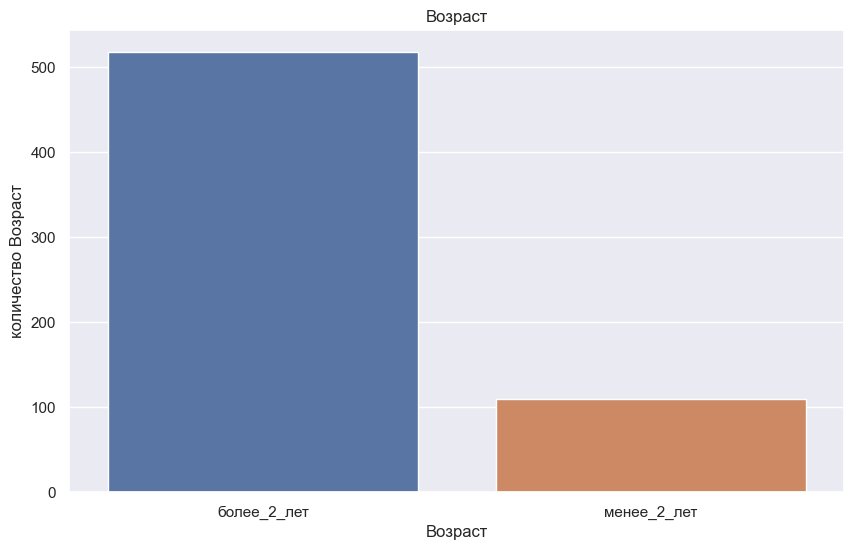

In [54]:
create_barplot(df_ferma_main, 'Возраст', 'Возраст')

порода

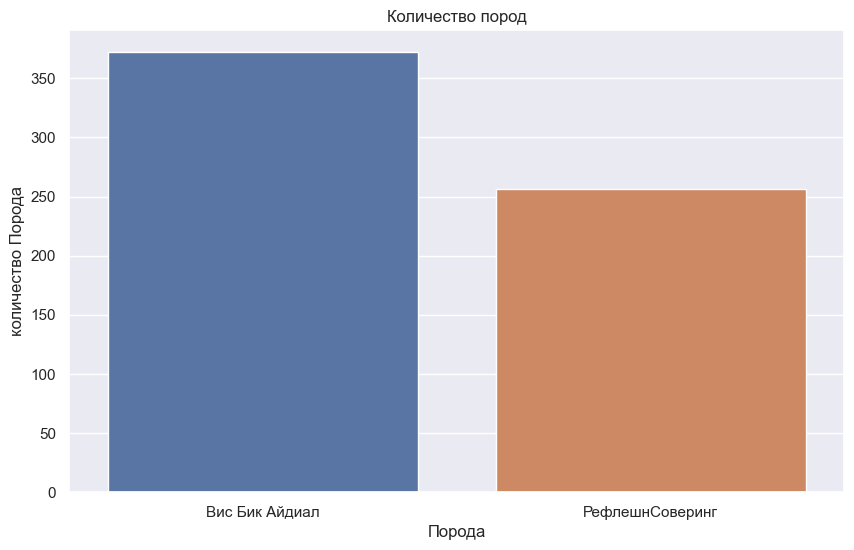

In [33]:
create_barplot(df_ferma_main, 'Порода', 'Количество пород')

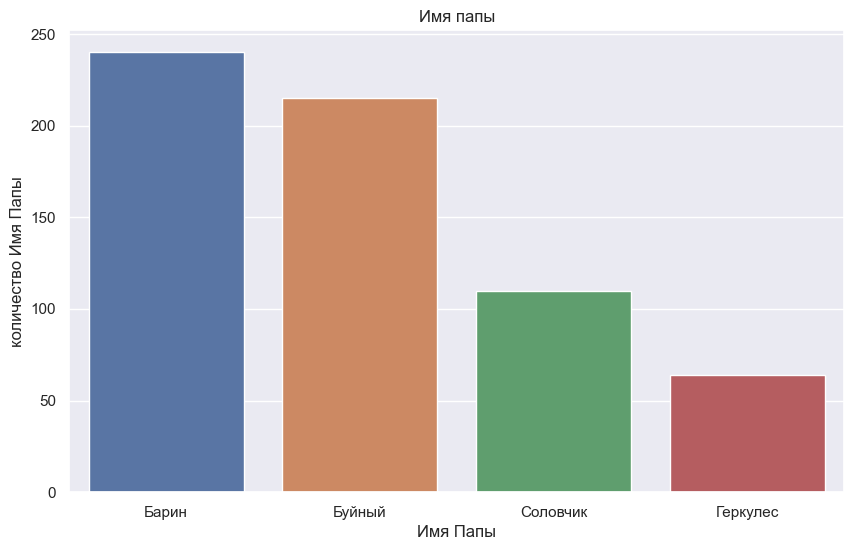

In [55]:
create_barplot(df_ferma_dad, 'Имя Папы', 'Имя папы')

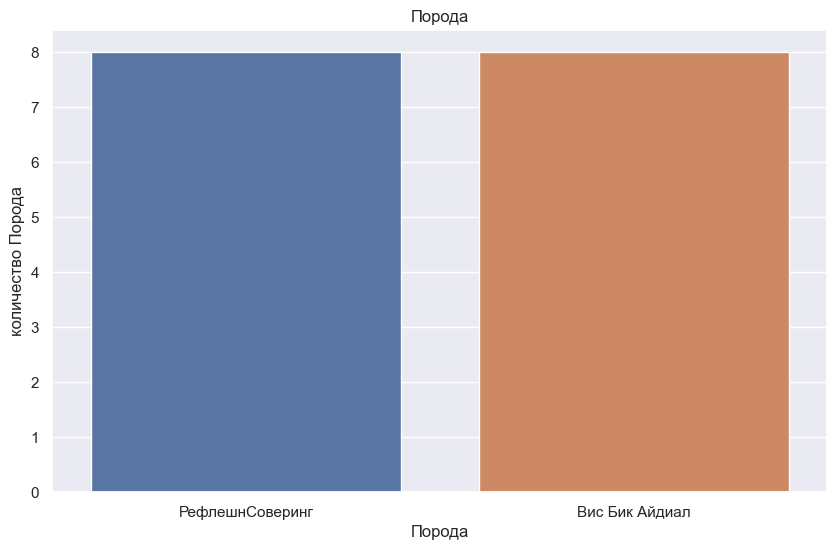

In [56]:
create_barplot(df_cow_buy, 'Порода', 'Порода')

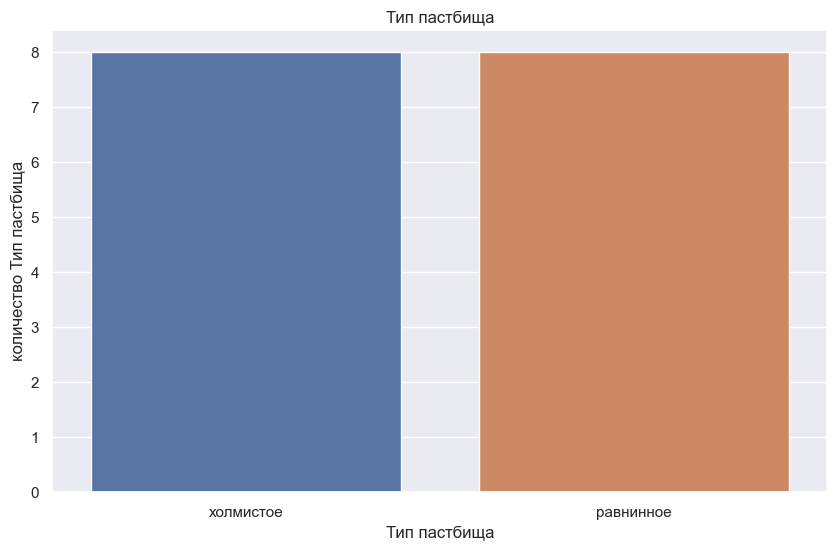

In [57]:
create_barplot(df_cow_buy, 'Тип пастбища', 'Тип пастбища')

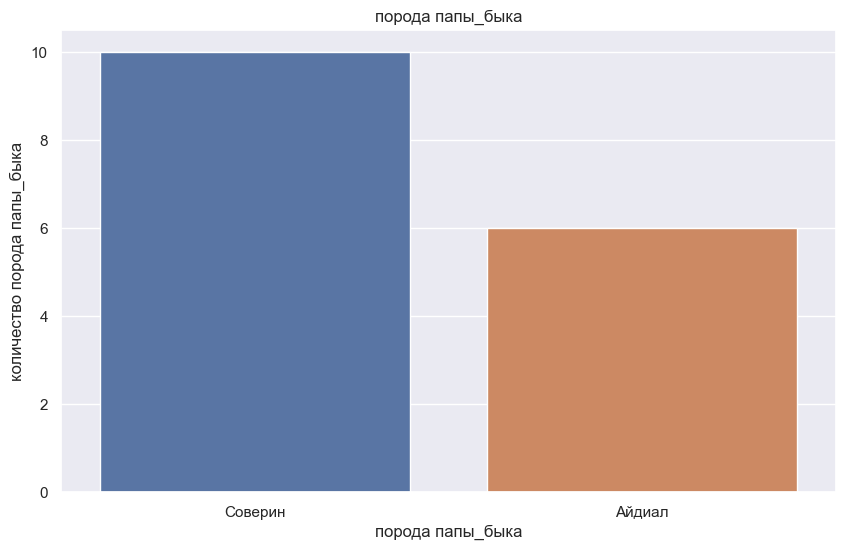

In [58]:
create_barplot(df_cow_buy, 'порода папы_быка', 'порода папы_быка')

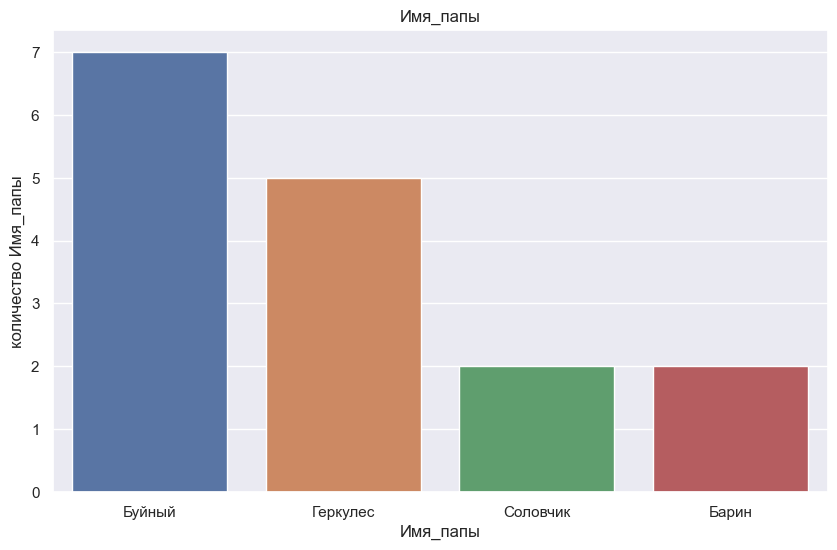

In [59]:
create_barplot(df_cow_buy, 'Имя_папы', 'Имя_папы')

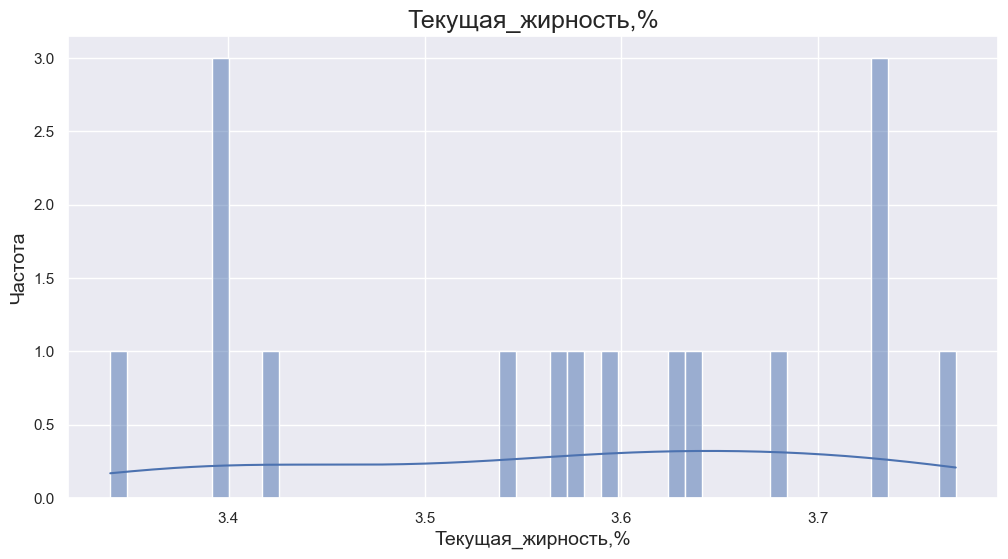

In [60]:
create_histogram(df_cow_buy, 'Текущая_жирность,%', 'Текущая_жирность,%')

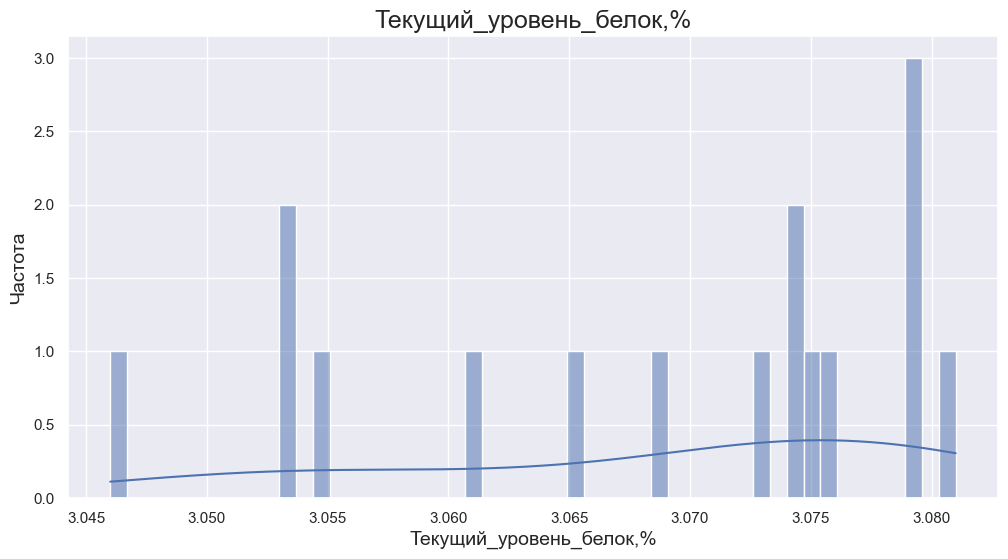

In [61]:
create_histogram(df_cow_buy, 'Текущий_уровень_белок,%', 'Текущий_уровень_белок,%')